# Random Forests

In [21]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Summer Grouped by Date Data

In [22]:
# Loading data
df_old = pd.read_csv("summer_groupby_date.csv")
df_old.head()

,Unnamed: 0,Date,LKSPOMET_ATemp,LKSBAWQ_Temp,LKSPOMET_WSpd,LKSBAWQ_Depth,LKSBAWQ_pH,LKSBAWQ_ChlFluor,LKSPOMET_TotPrcp,LKSBAWQ_Turb,Turbidity_Range,Month,Day,Year
0,0,06/01/2022,14.470833,14.061458,1.895833,1.229271,7.500000,9.479167,0.0,13.218750,</=15,6,1,2022
1,1,06/02/2022,15.936458,14.568750,2.660417,1.188958,7.477083,8.915625,0.0,11.458333,</=15,6,2,2022
2,2,06/03/2022,12.998958,15.028125,3.745833,1.208750,7.522917,8.331250,0.0,11.062500,</=15,6,3,2022
3,3,06/04/2022,16.417708,15.969792,1.981250,1.231667,7.500000,9.055208,0.0,10.197917,</=10,6,4,2022
4,4,06/05/2022,9.801042,16.790625,1.476042,1.223125,7.493750,9.984375,0.0,9.395833,</=10,6,5,2022


In [23]:
df_old.columns

Index(['Unnamed: 0', 'Date', 'LKSPOMET_ATemp', 'LKSBAWQ_Temp', 'LKSPOMET_WSpd',
       'LKSBAWQ_Depth', 'LKSBAWQ_pH', 'LKSBAWQ_ChlFluor', 'LKSPOMET_TotPrcp',
       'LKSBAWQ_Turb', 'Turbidity_Range', 'Month', 'Day', 'Year'],
      dtype='object')

In [24]:
df = df_old[[        'Month',
                     'LKSPOMET_ATemp', 
                    'LKSPOMET_TotPrcp',
                    'LKSBAWQ_Temp', 
                    'LKSPOMET_WSpd', 
                    'LKSBAWQ_Depth',
                    'LKSBAWQ_pH',
                     'Turbidity_Range',
                   ]]
df.head(100)

,Month,LKSPOMET_ATemp,LKSPOMET_TotPrcp,LKSBAWQ_Temp,LKSPOMET_WSpd,LKSBAWQ_Depth,LKSBAWQ_pH,Turbidity_Range
0,6,14.470833,0.000000,14.061458,1.895833,1.229271,7.500000,</=15
1,6,15.936458,0.000000,14.568750,2.660417,1.188958,7.477083,</=15
2,6,12.998958,0.000000,15.028125,3.745833,1.208750,7.522917,</=15
3,6,16.417708,0.000000,15.969792,1.981250,1.231667,7.500000,</=10
4,6,9.801042,0.000000,16.790625,1.476042,1.223125,7.493750,</=10
...,...,...,...,...,...,...,...,...
95,7,20.161053,0.003158,20.549474,1.896842,1.264526,7.651579,</=10
96,7,19.385417,0.008333,23.468750,0.998958,1.380208,8.315625,</=10
97,7,17.477083,0.015625,20.442708,2.838542,1.285313,7.660417,</=10
98,7,20.420833,0.000000,23.337500,1.109375,1.403229,8.241667,</=10


In [25]:
df.describe()

,Month,LKSPOMET_ATemp,LKSPOMET_TotPrcp,LKSBAWQ_Temp,LKSPOMET_WSpd,LKSBAWQ_Depth,LKSBAWQ_pH
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,6.993151,18.783107,0.020671,20.849815,1.573255,1.341473,7.829475
std,0.765611,3.812860,0.051007,2.179918,0.614463,0.080149,0.331961
min,6.000000,8.351042,0.000000,14.061458,0.454839,1.150521,7.346875
25%,6.000000,16.613555,0.000000,19.753385,1.113542,1.285521,7.561979
50%,7.000000,19.325000,0.000000,21.077083,1.414583,1.353073,7.723958
75%,8.000000,21.451042,0.009115,22.641667,1.899211,1.398698,8.016927
max,8.000000,26.368750,0.283333,24.990625,3.942708,1.500625,8.681250


In [26]:
# Define features set
X = df.copy()
X.drop("Turbidity_Range", axis=1, inplace=True)
X.head()

,Month,LKSPOMET_ATemp,LKSPOMET_TotPrcp,LKSBAWQ_Temp,LKSPOMET_WSpd,LKSBAWQ_Depth,LKSBAWQ_pH
0,6,14.470833,0.0,14.061458,1.895833,1.229271,7.500000
1,6,15.936458,0.0,14.568750,2.660417,1.188958,7.477083
2,6,12.998958,0.0,15.028125,3.745833,1.208750,7.522917
3,6,16.417708,0.0,15.969792,1.981250,1.231667,7.500000
4,6,9.801042,0.0,16.790625,1.476042,1.223125,7.493750


In [27]:
# Define target vector
y = df["Turbidity_Range"].ravel()
y[:50]

array(['</=15', '</=15', '</=15', '</=10', '</=10', '</=10', '</=10',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=10',
       '</=15', '</=10', '</=15', '</=10', '</=20', '</=10', '</=15',
       '</=10', '</=15', '</=15', '</=15', '</=10', '</=15', '</=10',
       '</=20', '</=15', '</=15', '</=20', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=10', '</=15', '</=10', '</=15', '</=10',
       '</=15'], dtype=object)

In [28]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [29]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [30]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [31]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [32]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=145, random_state=78)

In [33]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [34]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [35]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual </=5", "Actual </=10", "Actual </=15"], 
        columns=["Predicted </=5", "Predicted </=10", "Predicted </15"])
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [36]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted </=5,Predicted </=10,Predicted </15
Actual </=5,11,1,2
Actual </=10,2,11,0
Actual </=15,1,0,9


Accuracy Score : 0.8378378378378378
Classification Report
              precision    recall  f1-score   support

       </=10       0.79      0.79      0.79        14
       </=15       0.92      0.85      0.88        13
        </=5       0.82      0.90      0.86        10

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



## Feature Importance

In [37]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.20402659703400886, 'LKSBAWQ_Temp'),
 (0.19588668983297008, 'LKSBAWQ_pH'),
 (0.1800330230419978, 'LKSBAWQ_Depth'),
 (0.13689785565729332, 'Month'),
 (0.12065065651324625, 'LKSPOMET_WSpd'),
 (0.10417923666208673, 'LKSPOMET_ATemp'),
 (0.05832594125839701, 'LKSPOMET_TotPrcp')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

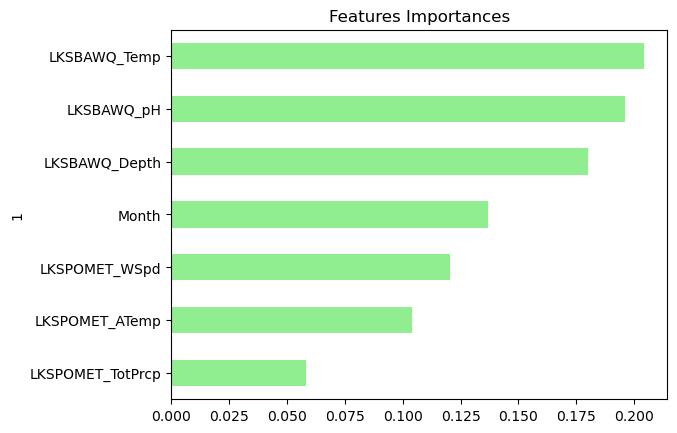

In [38]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)